In [81]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import bz2
import codecs
import xml
import glob
import os
import bs4
import collections
import itertools
import math
import networkx as nx
import community
import pickle
import numpy as np
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
from pattern.nl import parsetree, pprint, singularize, pluralize
from pattern.metrics import readability
from xml import parsers
import xml.parsers.expat
from xml.etree import cElementTree as ET
from xml.dom.minidom import parse
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import timeit
import random

In [13]:
#Inladen van de noodzakelijke data om de grafieken te maken
yearFrame = pickle.load( open( "frame.txt", "rb" ) )
netwerkDict = pickle.load( open( "netwerkFull.txt", "rb" ) )

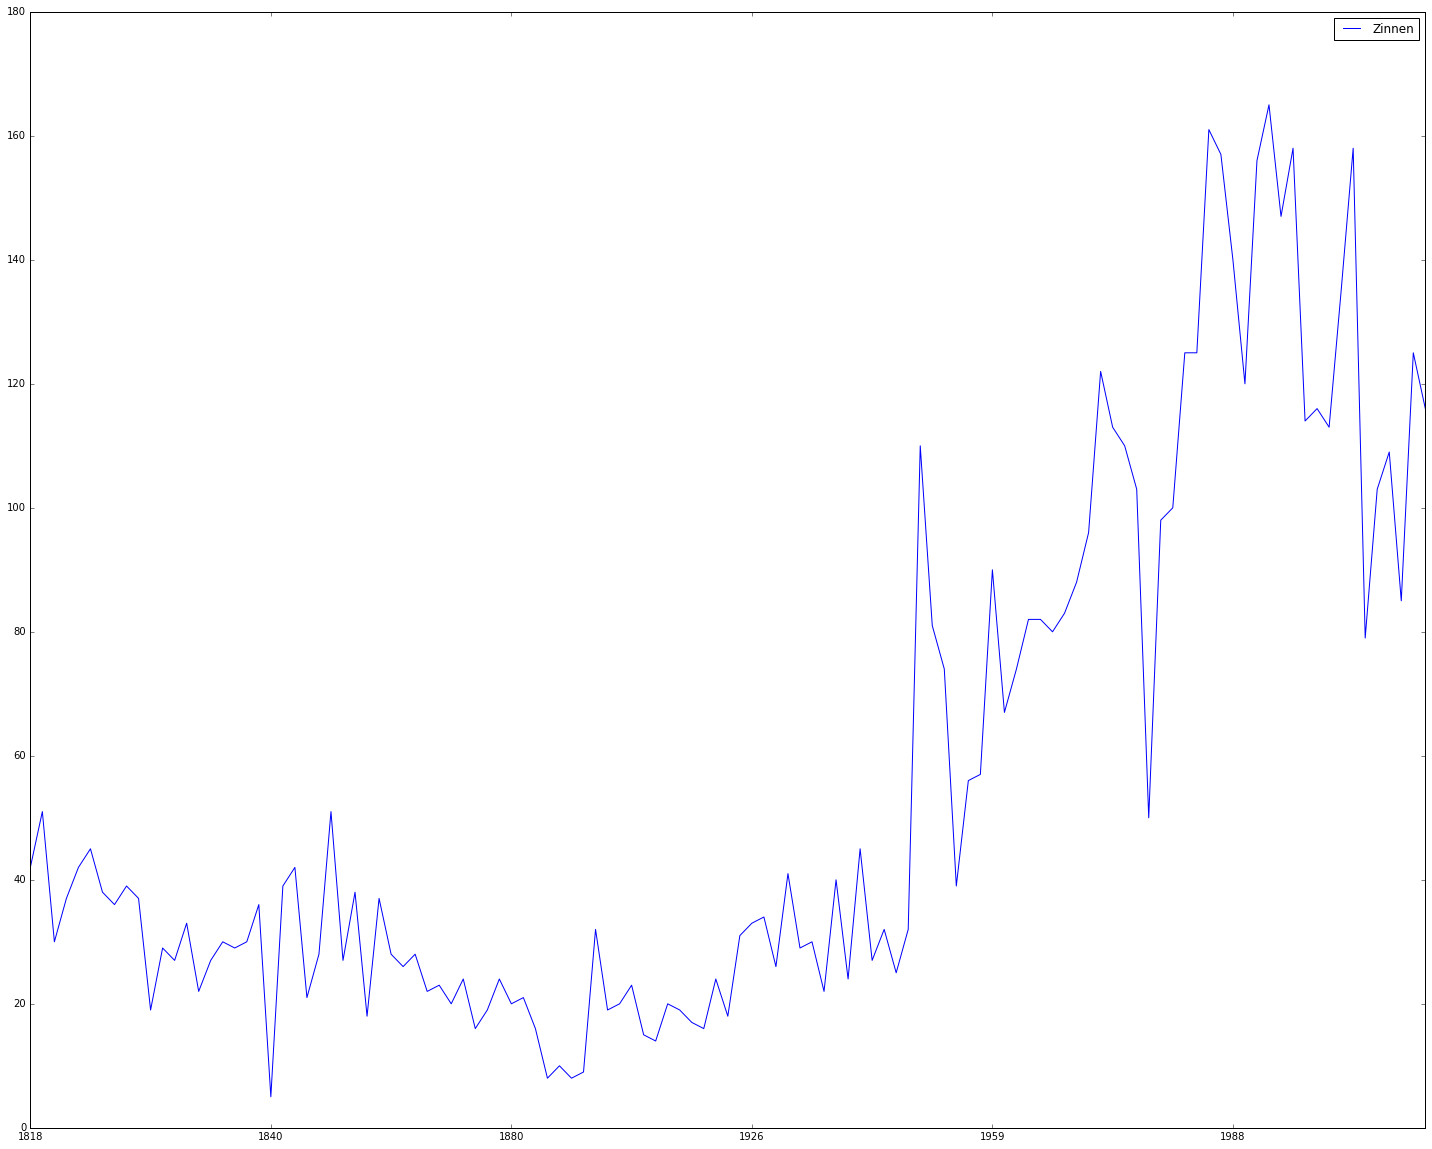

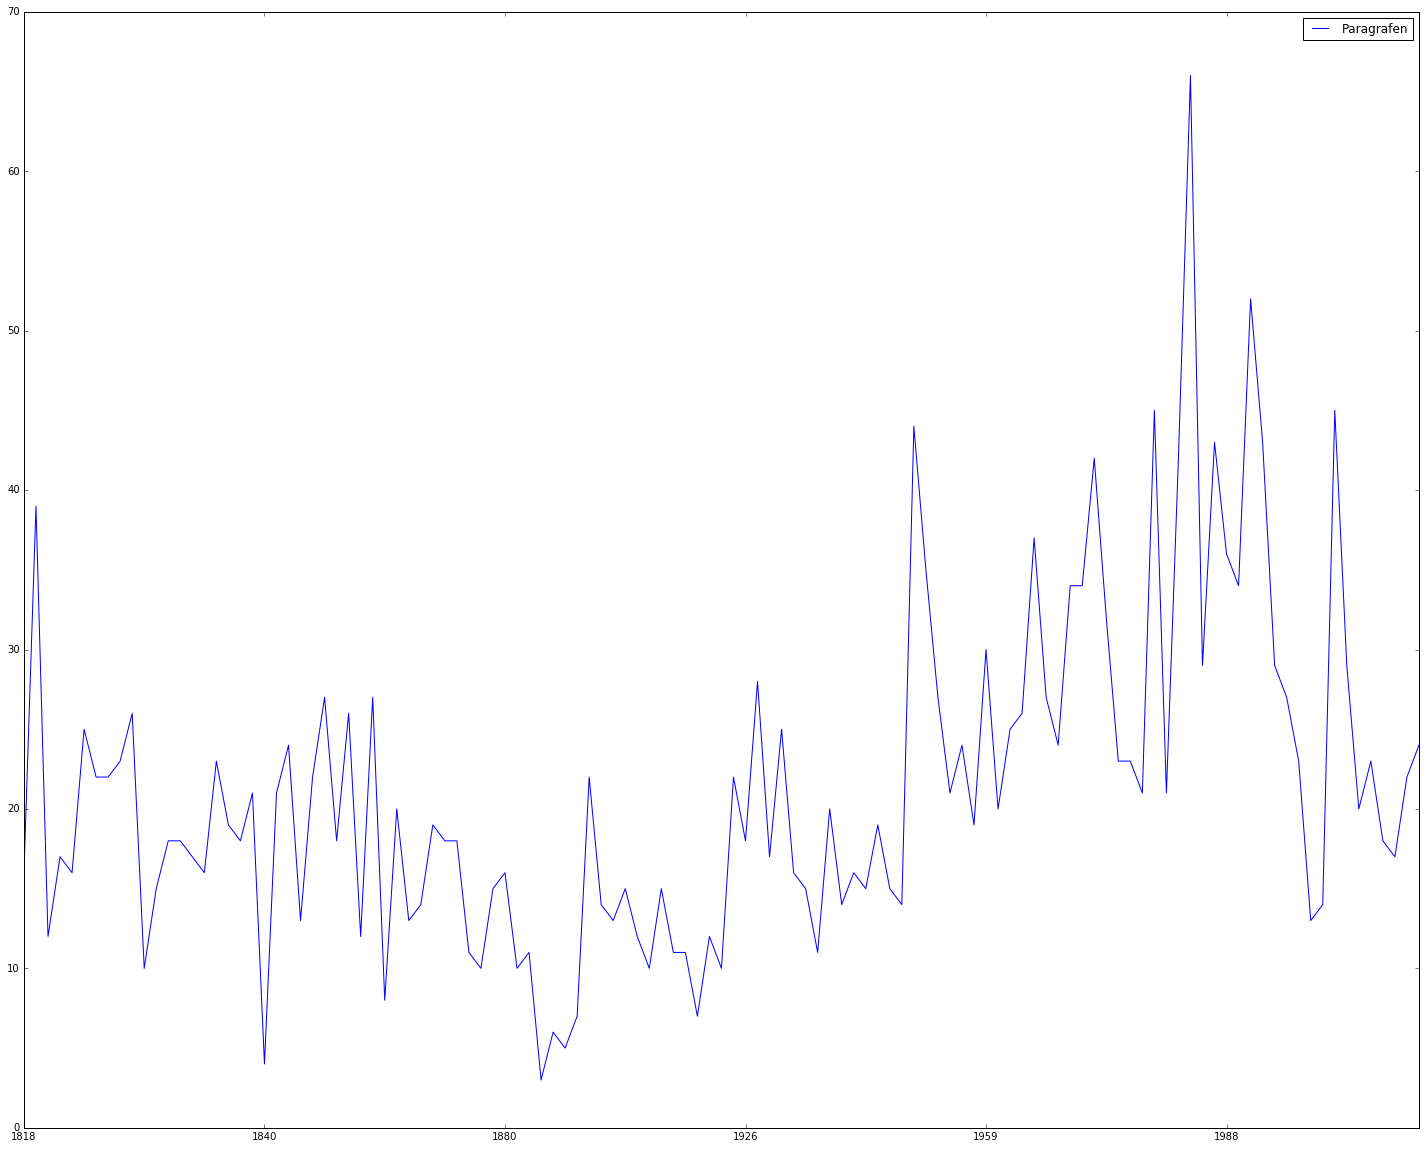

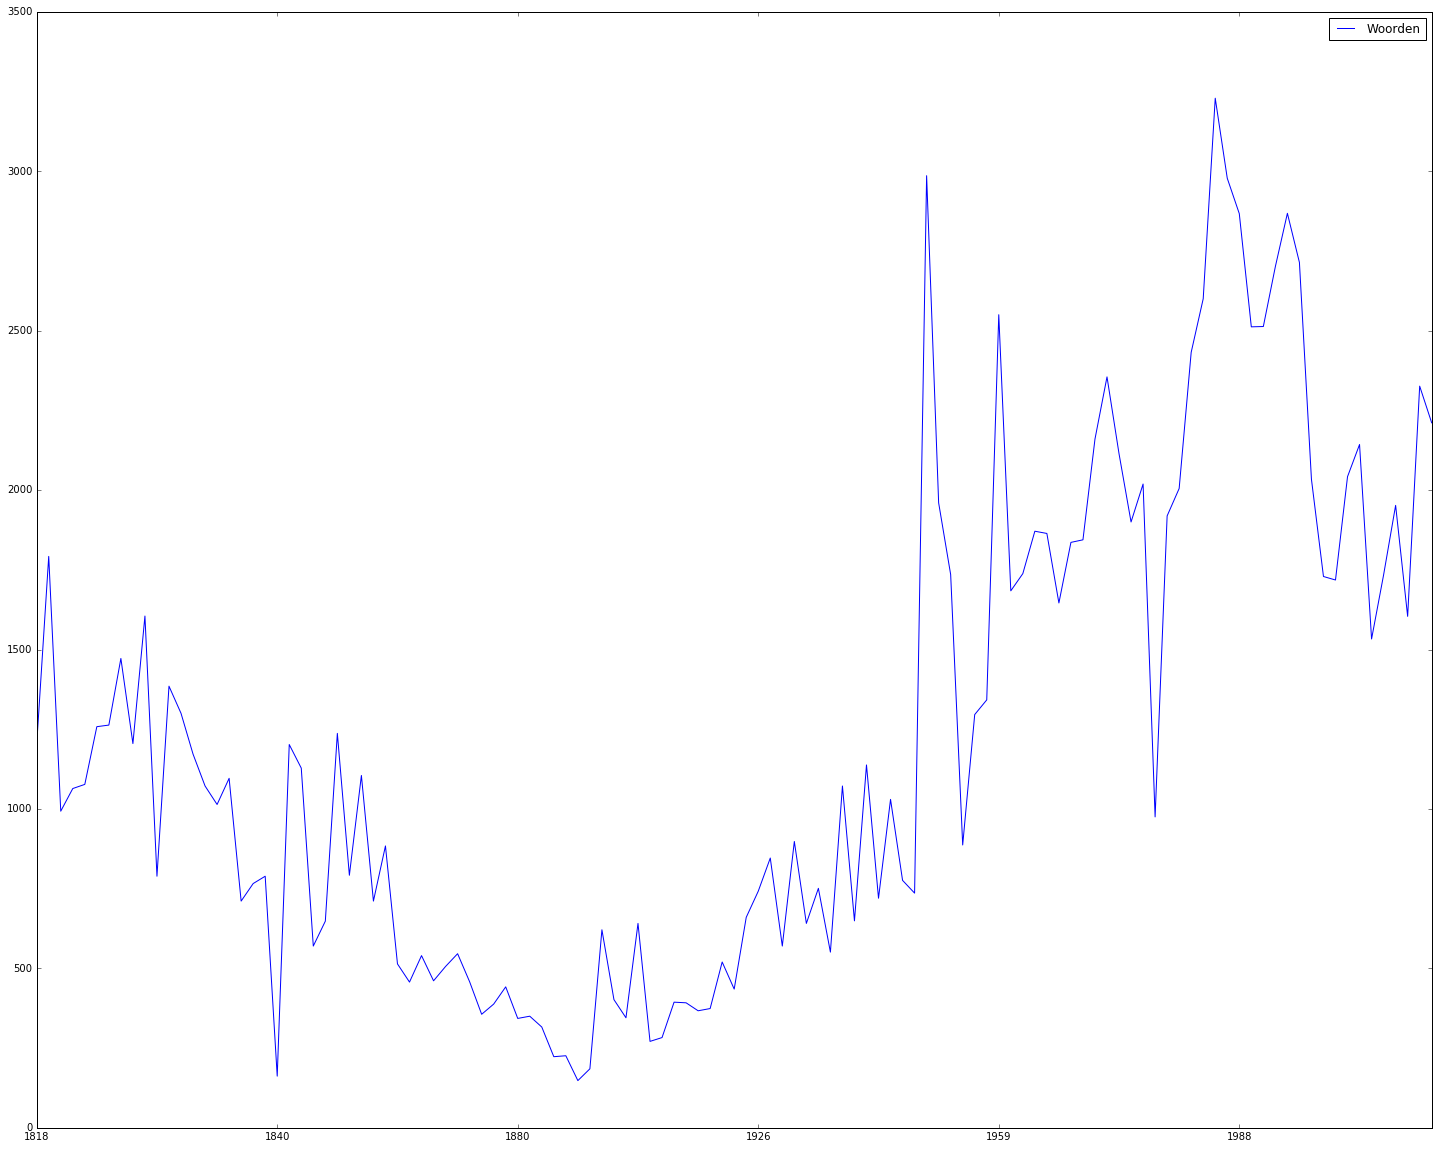

In [14]:
#Plotten van de graphs met jaarinformatie (deze kunnen mogelijk in de scriptie worden weergegeven)
yearFrame.plot(x=yearFrame.index.values, y='Zinnen')
yearFrame.plot(x=yearFrame.index.values, y='Paragrafen')
yearFrame.plot(x=yearFrame.index.values,y='Woorden')

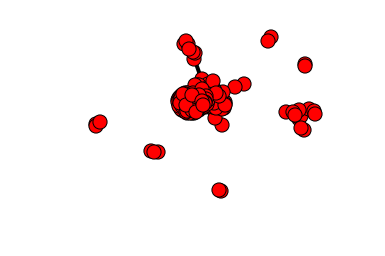

In [82]:
# Creeëren van de weighted graph vanuit de gevonden similarity scores
G = nx.Graph()
for item in netwerkDict:
    if netwerkDict[item] > 0.5:
        G.add_edge(str(item[0]),str(item[1]),weight=netwerkDict[item])

#G = nx.erdos_renyi_graph(100, 0.01)
    
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=200)

# edges
nx.draw_networkx_edges(G,pos, width=4)

# labels
#nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.figure(figsize=(1000,1000))
plt.show() # display

In [78]:
print G.nodes()

['infrastructuur', 'werkloosheid', 'aanpak', 'gebied', 'investering', 'middeel', 'vertegenwoordiger', 'samenleving', 'organisatie', 'bijdraag', 'behoeft', 'behandeling', 'inkomst', 'provincie', 'mogendheid', 'samenwerking', 'kracht', 'ed.mog', 'taak', 'centraal', 'mens', 'markt', 'vrede', 'innovatie', 'keuze', 'omvang', 'landbouw', 'baan', 'cultuur', 'grondslag', 'begrooting', 'scholing', 'begroting', 'maatregel', 'werkgever', 'natie', 'dag', 'duurzame', 'verantwoordelijkheid', 'werknemer', 'onderwijs', 'groei', 'bloei', 'wetgeving', 'behoud', 'groep', 'volk', 'gemeent', 'oplossing', 'bevordering', 'beperking', 'advies', 'name', 'aansluiting', 'leven', 'begeleiding', 'bevordeer', 'bestrijding', 'januari', 'gemeenschap', 'inkomen', 'herziening', 'jeugd', 'commissie', 'kennis', 'uitgaf', 'bijdrage', 'handhaf', 'burger', 'economie', 'kans', 'aanpassing', 'wetboek', 'generatie', 'doel', 'kamer', 'mate', 'mogelijkheid', 'noodzaak', 'armoede', 'rijks', 'beroep', 'europa', 'invoering', 'begin

In [79]:
G.community_infomap()

AttributeError: 'Graph' object has no attribute 'community_infomap'

In [84]:
# Vergroten van de graphs zodat ze duidelijker zijn
%pylab inline
pylab.rcParams['figure.figsize'] = 20, 30

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


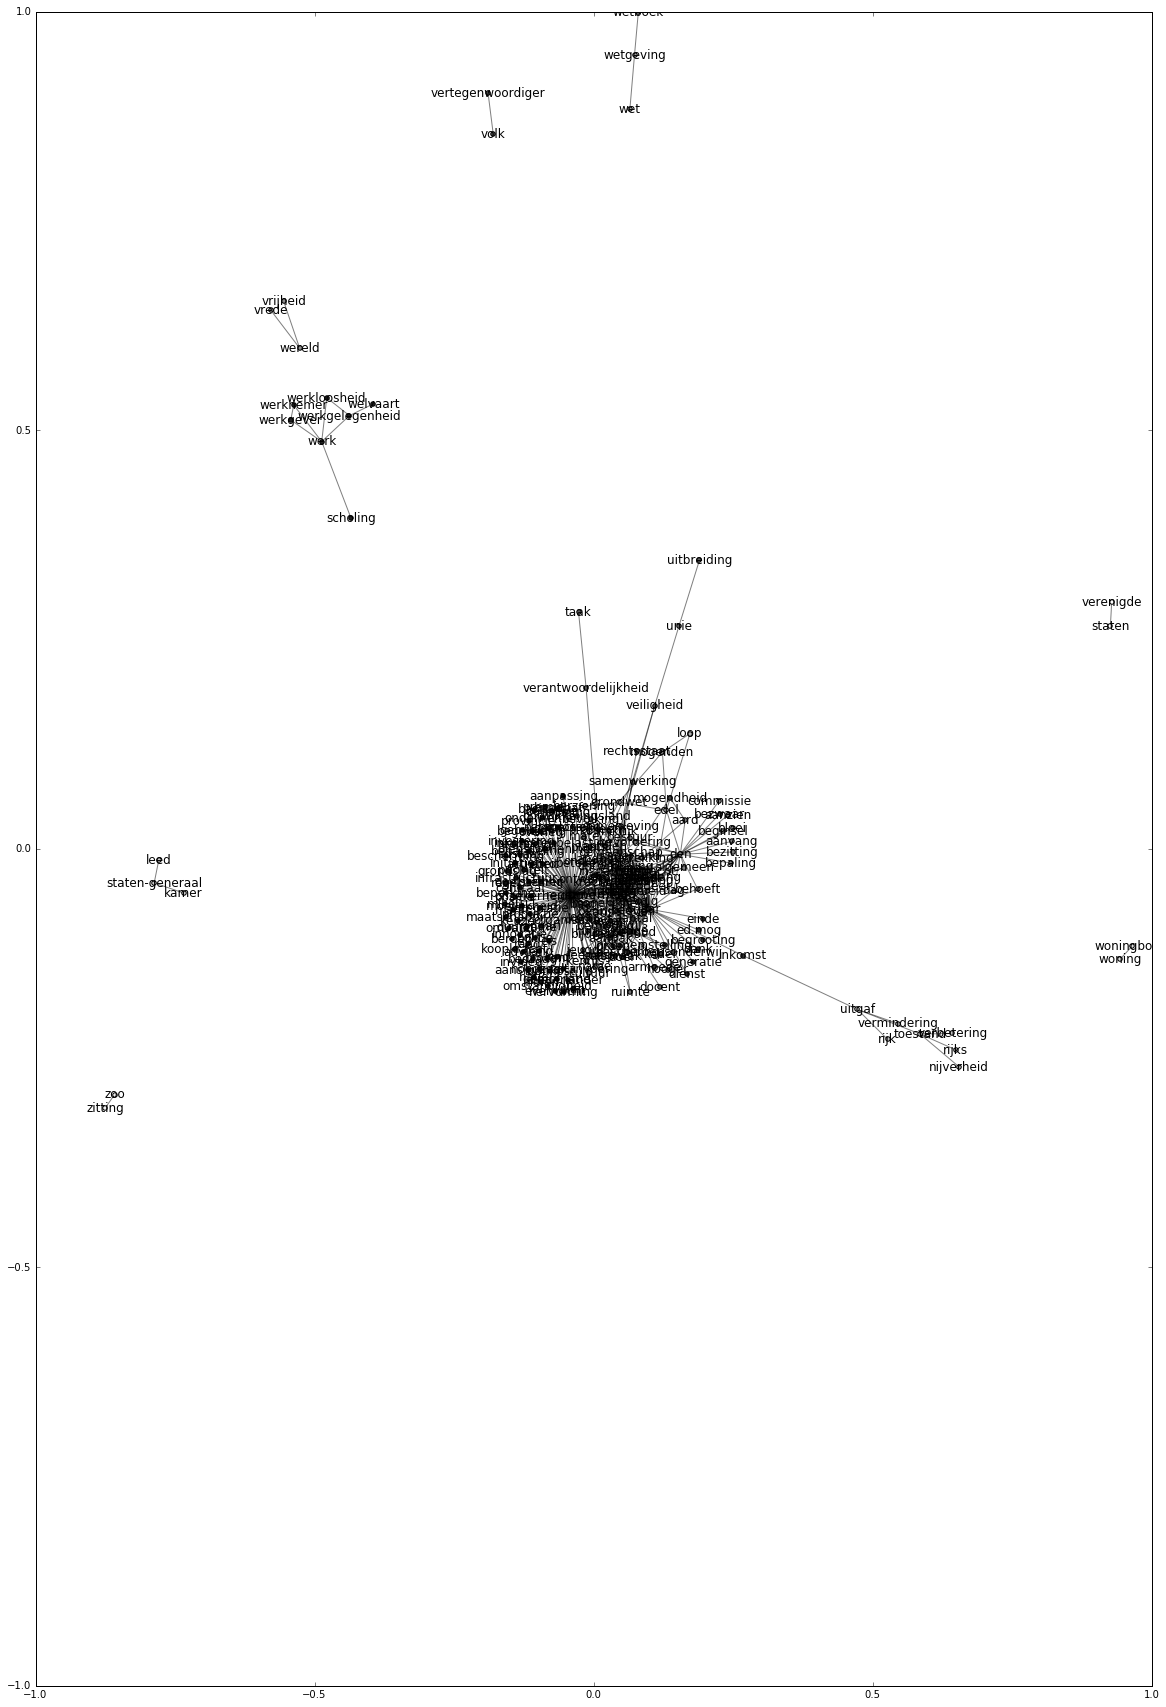

In [71]:
G = nx.Graph()
for item in netwerkDict:
    if netwerkDict[item] > 0.5:
        G.add_edge(str(item[0]),str(item[1]),weight=netwerkDict[item])
    
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif')
plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.savefig("graph09.png")
plt.show()

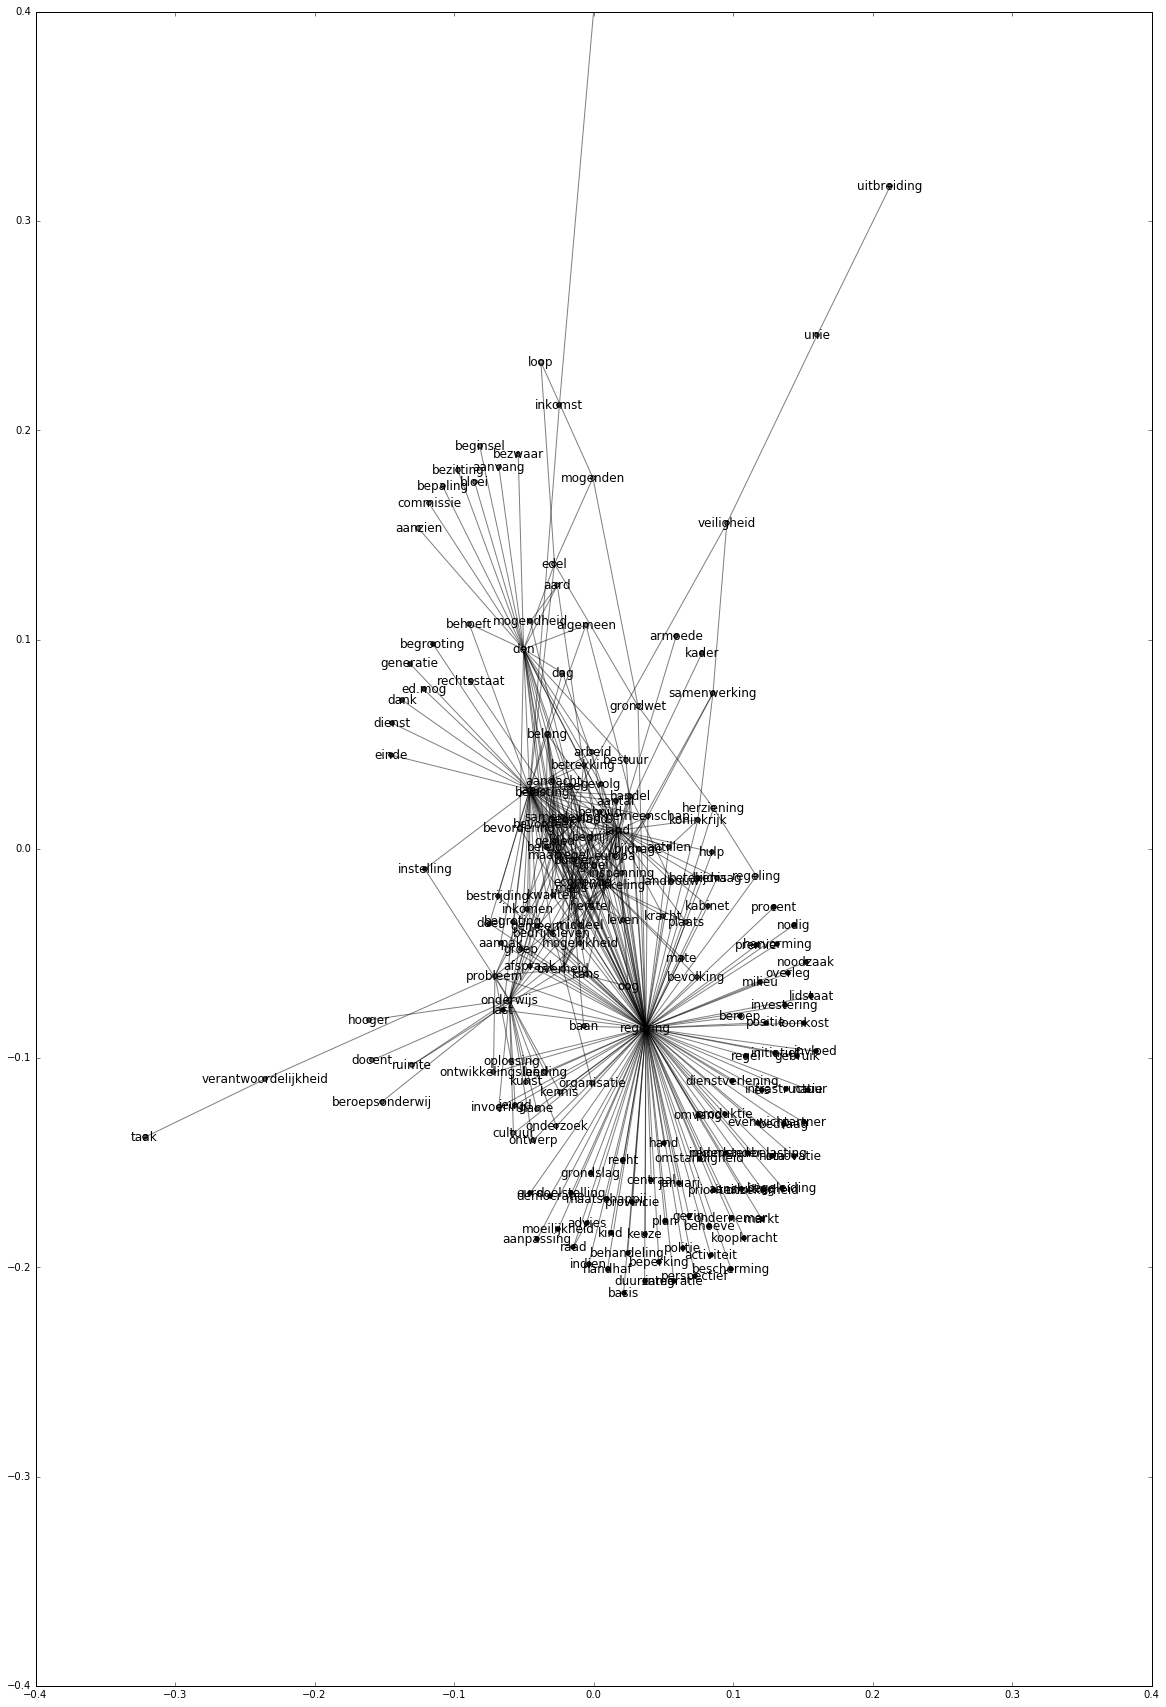

In [86]:
#Het clusteren via de community module
#G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif')
plt.xlim(-0.4,0.4)
plt.ylim(-0.4,0.4)
plt.savefig("zoomedFinal.png")
plt.show()

In [73]:
dendo = community.generate_dendrogram(G)
for level in range(len(dendo) - 1) :
    print("partition at level", level, "is", community.partition_at_level(dendo, level))
    print " "

('partition at level', 0, 'is', {'infrastructuur': 0, 'werkloosheid': 1, 'aanpak': 2, 'gebied': 3, 'investering': 0, 'middeel': 3, 'vertegenwoordiger': 4, 'samenleving': 5, 'organisatie': 6, 'bijdraag': 7, 'behoeft': 8, 'behandeling': 0, 'inkomst': 2, 'provincie': 0, 'mogendheid': 3, 'samenwerking': 9, 'kracht': 9, 'ed.mog': 2, 'taak': 10, 'centraal': 0, 'mens': 3, 'markt': 0, 'vrede': 11, 'innovatie': 0, 'keuze': 0, 'omvang': 0, 'landbouw': 9, 'baan': 3, 'cultuur': 12, 'grondslag': 0, 'begrooting': 2, 'scholing': 13, 'begroting': 2, 'maatregel': 3, 'bevolking': 9, 'werkgever': 13, 'natie': 0, 'dag': 8, 'duurzame': 0, 'verantwoordelijkheid': 10, 'werknemer': 13, 'onderwijs': 12, 'groei': 3, 'bloei': 8, 'wetgeving': 14, 'behoud': 2, 'groep': 2, 'volk': 4, 'gemeent': 2, 'oplossing': 15, 'bevordering': 8, 'beperking': 0, 'advies': 0, 'name': 12, 'aansluiting': 0, 'leven': 7, 'begeleiding': 0, 'bevordeer': 8, 'bestrijding': 2, 'januari': 0, 'gemeenschap': 9, 'inkomen': 2, 'herziening': 16,

In [49]:
yearList = ['1818', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833',
            '1834', '1835', '1836', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', 
            '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1882', '1883', '1884', '1885', 
            '1886', '1887', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1904', '1923', '1925', 
            '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1946', 
            '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1976', 
            '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '2000', '2001', '2002', 
            '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

yearList = yearFrame.index.values
cat1 = [random.randint(0,26) for r in xrange(117)]
cat2 = [random.randint(25,51) for r in xrange(117)]
cat3 = [random.randint(50,76) for r in xrange(117)]
cat4 = [random.randint(75,101) for r in xrange(117)]
catlist = {}
total = 0
for x in xrange(0,7):
    parts = float(100/len(xrange(0,7)))
    catlist[x] = [random.randint(total,total+parts) for r in xrange(117)]
    total += parts

test1 = [20 for r in xrange(117)]
test2 = [60 for r in xrange(117)]
test3 = [65 for r in xrange(117)]
test4 = [100 for r in xrange(117)]

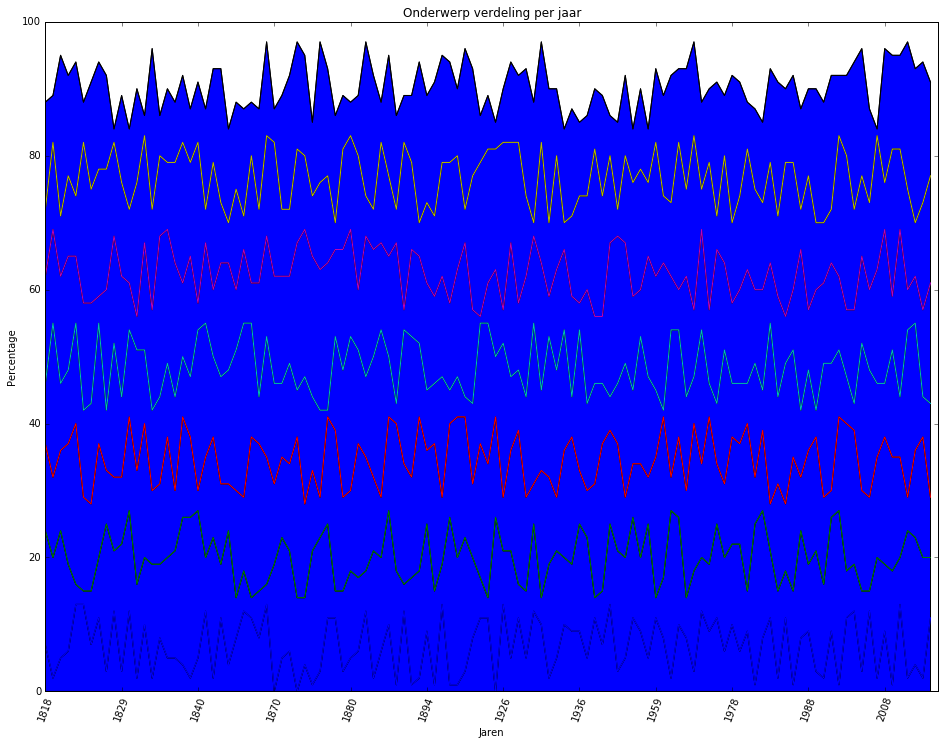

In [71]:
#Maken van de plot voor figuur 4
times = [x for x in xrange(0,len(yearList))]
ticks = yearList[0::10]

# red dashes, blue squares and green triangles
plt.xlabel('Jaren')
plt.ylabel('Percentage')
plt.title('Onderwerp verdeling per jaar')
plt.ylim(0,100)
plt.xlim(0,117)
plt.xticks(rotation=70)
plt.xticks(np.arange(0, 118, 10.0),ticks)
#plt.plot(times, cat1, 'red')
#plt.plot(times, cat2, 'blue')
#plt.plot(times, cat3, 'green')
#plt.plot(times, cat4, 'orange')
for cat in catlist:
    plt.plot(times,catlist[cat])
    if cat == 0:
        plt.fill_between(times,0,catlist[cat])
    else:
        plt.fill_between(times,catlist[cat-1],catlist[cat])
plt.show()